
# **DL for Images project : Face Mask Detection**
# Merhben Oumaima 

---
---



The objective of this project is to create an image classification machine learning model to accurately predict the likelihood that an image contains a person wearing a face mask, or not. 

# Import TensorFlow 2.0

We import all the necessary packages. We are going to work with Tensorflow 2.0.

In [ ]:
%tensorflow_version 2.x #to avoid loading another version at run time 
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from numpy import asarray

from matplotlib import image

import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D ,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense 

from sklearn.model_selection import train_test_split


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #to avoid loading another version at run time`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Using TensorFlow backend.


**Note:**  We limit the workshop to GPUs.

# Image Classification

## Loading & Looking at the data


We download the data from google drive .

The dataset contains 1308 images with two types : people or images with face masks (1) and people or images without (0) . We download a csv file with ids and targets( 0 or 1) of these images .

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Dauphine_Projet_Image2020/' 

In [ ]:
data=pd.read_csv(path+'train_labels.csv')
data.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [ ]:
data.shape

(1308, 2)

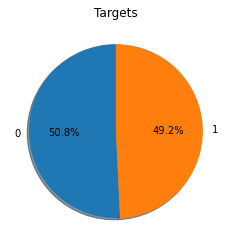

In [ ]:
count=data['target'].value_counts()
labels = '0','1'
sizes = [count[0]/len(data),count[1]/len(data)]
fig1, ax1 = plt.subplots()
ax1.set_title('Targets')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

The target are distributed equally , we have an equipartition of the data .

## Visualize Images

We'll build a function to display images based on the number of rows and cols we'd like to display. 

In [ ]:
#### Build a function that displays a set of images with their labels based on a number of rows and columns. 
def display_images(images, labels, rows, cols, additional_input=''):#sample here is an image from a dataset tfds
  fig = plt.figure(figsize=(8,8))
  for img in range(rows*cols):
    ax = fig.add_subplot(rows,cols,1+img)
    i=image.imread(path+images[img])
    ax.imshow(i)
    ax.set_axis_off()
    if additional_input!='':
      ax.set_title(str(labels[img])+ ' vs: ' +str(additional_input[img]))
    else:
      ax.set_title(str(labels[img]))



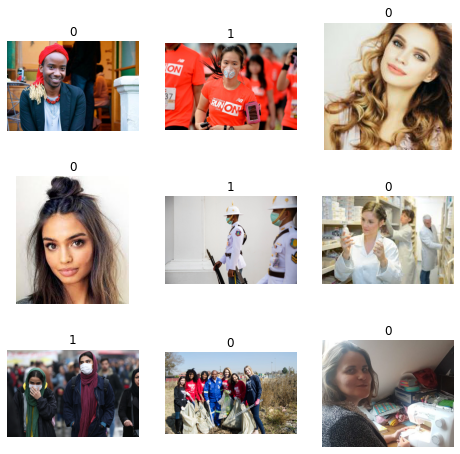

In [ ]:
#### Display a few images to explore the dataset
display_images(data.image, data.target, 3, 3)

##Data preprocessing


To make the data ready for the ML , we encode , normalize (floats & values between [0-1]) and  standardize all images . For that We'll build  a  preprocessing function that converts images into arrays with float32 values between 0 and 1 and size of (300,300) .

In [ ]:
#### Build a preprocessing function that converts images into arrays .
def preprocessing_Img(Images_Id):
  x=[]
  # load the image
  for i in (Images_Id):
    img = Image.open(path+i)
    IMAGE_PATH=path+i
    # resize image 
    img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(300,300))
    # from image to array
    img=tf.keras.preprocessing.image.img_to_array(img)
    # convert from integers to floats and normalize to range 0-1
    img=tf.keras.applications.xception.preprocess_input(img)

    x.append(img)
  n=np.array(x)
  return(n)

 We split our data into images and targets and preprocess all images in the dataset .

In [ ]:
X=preprocessing_Img(data.image)
y=data.target
print('done')

done


We split the data into train and test .

In [ ]:
###split the data into train and test
num_test = 0.20
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=num_test, random_state=23)

In [ ]:
#### - Print dataset shapes (images & labels)
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((1046, 300, 300, 3), (1046,), (262, 300, 300, 3), (262,))

In [ ]:
train_images[0]

array([[[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.92941177,  0.8901961 ,  0.8666667 ],
        [ 0.92941177,  0.8901961 ,  0.8666667 ],
        ...,
        [ 0.9137255 ,  0.7019608 ,  0.47450984],
        [ 0.9137255 ,  0.7019608 ,  0.47450984],
        [ 0.8117647 ,  0.67058825,  0.49803925]],

       [[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        ...,
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8117647 ,  0.67058825,  0.5137255 ]],

       [[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        ...,
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8117647 ,  0.67058825,  0.5137255 ]],

       ...,

       [[ 0.67058825,  0.6784314 ,  0.69411767],
        [ 0

#Build and Train a Baseline Model

In [ ]:
input_shape=train_images[0].shape
input_shape

(300, 300, 3)

First we create a basic model made of a convolutional bloc.
The first convolutional block includes 3 convolutional layers “Conv2D” and 3 “MaxPooling2D” layers.

In [ ]:
def conv_block(filter_size, kernel_size, max_pooling_size, activation_type=None, input_shape=None): 
  model = Sequential()
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, input_shape=input_shape, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  return model

We instanciate the model 


In [ ]:
base_model = conv_block(32, (3, 3), (2, 2), activation_type='relu', input_shape=input_shape)

Then , we flatten and add a full dense layer as well as a classification layer to the base model


In [ ]:
base_model.add(Flatten())
base_model.add(Dense(128, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(60, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(1,activation='sigmoid'))

In [ ]:
#### Compile the model
base_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)            

In [ ]:
#### Fit the model (we use the test set as  validation data)
history = base_model.fit(train_images, train_labels, epochs=24, batch_size=64, 
                    validation_data=(test_images, test_labels))

Train on 1046 samples, validate on 262 samples
Epoch 1/24
1046/1046 [==============================] - 12s 12ms/step - loss: 1.1226 - accuracy: 0.4971 - val_loss: 0.6892 - val_accuracy: 0.5840
Epoch 2/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.6934 - accuracy: 0.5325 - val_loss: 0.6644 - val_accuracy: 0.6183
Epoch 3/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.6888 - accuracy: 0.5535 - val_loss: 0.9409 - val_accuracy: 0.5229
Epoch 4/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.7080 - accuracy: 0.5516 - val_loss: 0.6686 - val_accuracy: 0.6527
Epoch 5/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.6876 - accuracy: 0.6071 - val_loss: 0.6556 - val_accuracy: 0.5878
Epoch 6/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.7071 - accuracy: 0.6272 - val_loss: 0.6477 - val_accuracy: 0.6527
Epoch 7/24
1046/1046 [==============================] - 5s 4ms/step - loss: 0.6434 - ac

In [ ]:
# Evaluate the model via the evaluate function of a tf model
_, acc = base_model.evaluate(test_images, test_labels, verbose=1)
print('> %.3f' % (acc * 100.0))

262/262 [==============================] - 1s 3ms/step
> 66.794


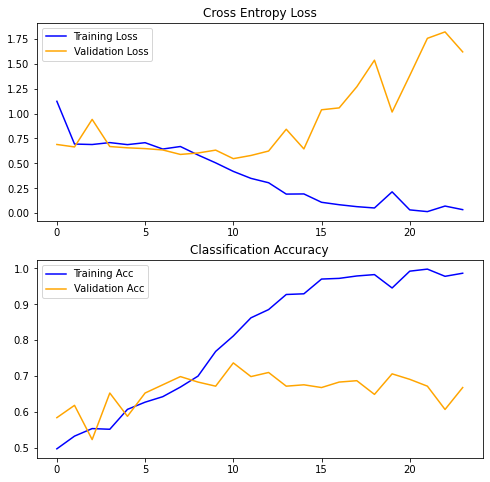

In [ ]:
##### Display the loss and metric curves  
def accuracy_lost_curves(history):
  fig = plt.figure(figsize=(8,8))
  # plot loss
  ax1 = fig.add_subplot(2,1,1)
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='orange', label='test')
  ax1.set_title('Cross Entropy Loss')
  ax1.legend(['Training Loss', 'Validation Loss'])
	# plot accuracy
  ax2 = fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='orange', label='test')
  ax2.set_title('Classification Accuracy')
  ax2.legend(['Training Acc', 'Validation Acc'])
  
# Learning curves
accuracy_lost_curves(history)

**Comments:** these results show that the model is overfitting after a few iterations, the training metric improves but the model is not performing well on the test set.

#In this part we'll see how we can prevent overfitting and improve the model

##With Data Augmentation

We use data augmentation to expand the training dataset in order to improve the performance and ability of the model to generalize.

Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_images, train_labels, batch_size=64)

In [ ]:
#### Fit the model 
epochs = 20
print("Training with Augmented Data")
steps = int(train_images.shape[0] / 64)
history = base_model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels), verbose=1)


Training with Augmented Data
Epoch 1/20
16/16 [==============================] - 20s 1s/step - loss: 0.8234 - accuracy: 0.6711 - val_loss: 0.5551 - val_accuracy: 0.7023
Epoch 2/20
16/16 [==============================] - 20s 1s/step - loss: 0.5904 - accuracy: 0.6864 - val_loss: 0.6155 - val_accuracy: 0.6947
Epoch 3/20
16/16 [==============================] - 20s 1s/step - loss: 0.5839 - accuracy: 0.7016 - val_loss: 0.5349 - val_accuracy: 0.7519
Epoch 4/20
16/16 [==============================] - 20s 1s/step - loss: 0.5725 - accuracy: 0.7129 - val_loss: 0.5147 - val_accuracy: 0.7824
Epoch 5/20
16/16 [==============================] - 19s 1s/step - loss: 0.6009 - accuracy: 0.7021 - val_loss: 0.5688 - val_accuracy: 0.7290
Epoch 6/20
16/16 [==============================] - 20s 1s/step - loss: 0.5490 - accuracy: 0.7236 - val_loss: 0.5196 - val_accuracy: 0.7481
Epoch 7/20
16/16 [==============================] - 19s 1s/step - loss: 0.5474 - accuracy: 0.7468 - val_loss: 0.8621 - val_accuracy

In [ ]:
# Evaluate your model via the evaluate function of a tf model
_, acc = base_model.evaluate(test_images, test_labels, verbose=1)
print('> %.3f' % (acc * 100.0))


262/262 [==============================] - 1s 2ms/step
> 78.244


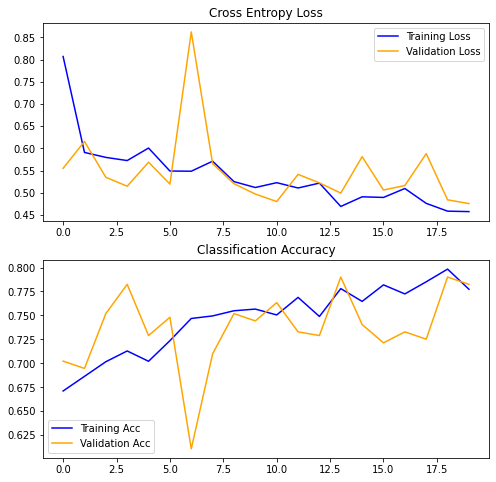

In [ ]:
# Learning curves
accuracy_lost_curves(history)

**Comments:** Data augmentation minimize the distance between the training and validation set and avoid overfitting .The performance of the model improves .


##With Transfer Learning

Transfer learning is about borrowing CNN architecture with its pre-trained parameters from someone else. When we train our own data on the top of the pre-trained parameters, we can easily reach to the target accuracy.

We chose the VGG19 model.

In [ ]:
base_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape)
base_model.trainable = True

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.GlobalAveragePooling2D())
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.9))
top_layers.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 9, 9, 512)         20024384  
_________________________________________________________________
sequential (Sequential)      (None, 1)                 66305     
Total params: 20,090,689
Trainable params: 20,090,433
Non-trainable params: 256
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#### Fit the model 
epochs = 20
print("Training withOUT Augmented Data")
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=64, 
                  validation_data=(test_images, test_labels))

Training withOUT Augmented Data
Epoch 1/20
17/17 [==============================] - 72s 4s/step - loss: 1.3568 - accuracy: 0.5258 - val_loss: 0.6561 - val_accuracy: 0.6374
Epoch 2/20
17/17 [==============================] - 63s 4s/step - loss: 0.9550 - accuracy: 0.6310 - val_loss: 0.6207 - val_accuracy: 0.6565
Epoch 3/20
17/17 [==============================] - 63s 4s/step - loss: 0.5471 - accuracy: 0.7591 - val_loss: 0.4795 - val_accuracy: 0.8817
Epoch 4/20
17/17 [==============================] - 63s 4s/step - loss: 0.3541 - accuracy: 0.8489 - val_loss: 0.3975 - val_accuracy: 0.9504
Epoch 5/20
17/17 [==============================] - 63s 4s/step - loss: 0.2482 - accuracy: 0.9101 - val_loss: 0.2902 - val_accuracy: 0.9580
Epoch 6/20
17/17 [==============================] - 63s 4s/step - loss: 0.1748 - accuracy: 0.9388 - val_loss: 0.2913 - val_accuracy: 0.8931
Epoch 7/20
17/17 [==============================] - 63s 4s/step - loss: 0.1607 - accuracy: 0.9560 - val_loss: 0.1970 - val_accur

In [ ]:
_, acc = model.evaluate(test_images, test_labels, verbose=1)
print('> %.3f' % (acc * 100.0))

9/9 [==============================] - 5s 526ms/step - loss: 0.0854 - accuracy: 0.9733
> 97.328


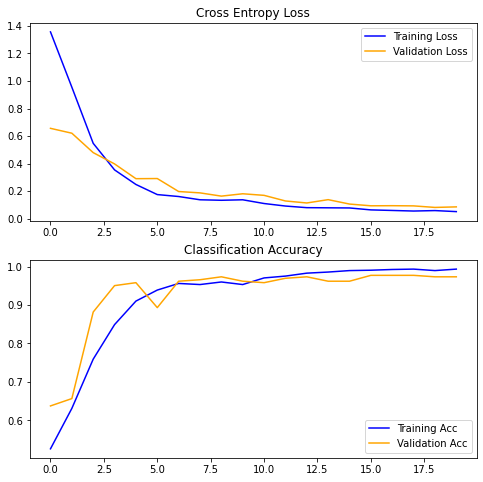

In [ ]:
accuracy_lost_curves(history)

**Comments:** The transfer Learning shows a notable performances , it prevents overfitting and gives the highest accuracy until now.

##With Transfer Learning and Data Augmentation 

In this part we use both Transfer Learning and Data Augmentation

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_images, train_labels, batch_size=64)

In [ ]:
print("Training with Augmented Data")
steps = int(train_images.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels), verbose=1)

Training with Augmented Data
Epoch 1/20
16/16 [==============================] - 61s 4s/step - loss: 0.0721 - accuracy: 0.9883 - val_loss: 0.1420 - val_accuracy: 0.9389
Epoch 2/20
16/16 [==============================] - 62s 4s/step - loss: 0.0706 - accuracy: 0.9827 - val_loss: 0.1099 - val_accuracy: 0.9580
Epoch 3/20
16/16 [==============================] - 60s 4s/step - loss: 0.0649 - accuracy: 0.9868 - val_loss: 0.0784 - val_accuracy: 0.9809
Epoch 4/20
16/16 [==============================] - 59s 4s/step - loss: 0.0764 - accuracy: 0.9817 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 5/20
16/16 [==============================] - 60s 4s/step - loss: 0.0683 - accuracy: 0.9817 - val_loss: 0.1060 - val_accuracy: 0.9618
Epoch 6/20
16/16 [==============================] - 60s 4s/step - loss: 0.0561 - accuracy: 0.9919 - val_loss: 0.0625 - val_accuracy: 0.9809
Epoch 7/20
16/16 [==============================] - 60s 4s/step - loss: 0.0542 - accuracy: 0.9898 - val_loss: 0.0596 - val_accuracy

In [ ]:
# Evaluate your model via the evaluate function of a tf model
_, acc = model.evaluate(test_images, test_labels, verbose=1)
print('> %.3f' % (acc * 100.0))

9/9 [==============================] - 5s 527ms/step - loss: 0.0665 - accuracy: 0.9733
> 97.328


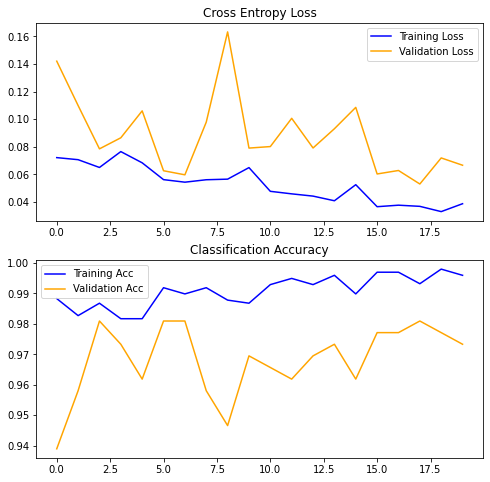

In [ ]:
accuracy_lost_curves(history)

**Comments:** Transfer Learning with Data Augmentation show a good performance as well , the model appeares to have a high accuracy.